# Analyze Starbucks All Over the World

## 1. Introduction

### What is Starbucks?

**Starbucks Corporation** is an American coffee company and coffeehouse chain. **Starbucks** was founded in Seattle, Washington, in 1971. As of early 2019, the company operates over 30,000 locations worldwide.  

**Starbucks** has been described as the main representative of "second wave coffee," a retrospectively termed movement that popularized artisanal coffee, particularly darkly roasted coffee. Since the 2000s, third wave coffee makers have targeted quality-minded coffee drinkers with hand-made coffee based on lighter roasts, while **Starbucks** nowadays uses automated espresso machines for efficiency and safety reasons.  

**Starbucks** first became profitable in Seattle in the early 1980s. Despite an initial economic downturn with its expansion into the Midwest and British Columbia in the late 1980s, the company experienced revitalized prosperity with its entry into California in the early 1990s. The first **Starbucks** location outside North America opened in Tokyo in 1996; overseas properties now constitute almost one-third of its stores. The company opened an average of two new locations daily between 1987 and 2007. In 2010, the company began its **Starbucks Reserve** program for single-origin coffees and high-end coffee shops. **Starbucks** operates six roasteries with tasting rooms and 43 coffee bars as part of the program. In November 2019, the world's largest **Starbucks** opened in Chicago on the Magnificent Mile as the sixth roastery location.



###  What is the business problem?

Thesedays, Everyone knows about Starbucks. Also, Starbucks is the largest coffee shop company in the world. Although some people complain that Starbucks prices are much too high, Starbucks is still becoming more and more popular throughout the world.  


Actually, Starbucks was once thought of as a very exclusive brand, but in some cities there are Starbucks on every block. Therefore, People all over the world are getting used to seeing a Starbucks coffee shop just around the corner. According to the Michelli's book, Starbucks may be popular not only for their coffee, but also for their business style.  

Because of its popularity, well-developed business districts can be developed after Starbucks coffee shops were created. That is, Starbucks coffee shops are giving positive effects to the market of that region.

### Who will be interested in this project?

- Storekeepers who want to open up shops can consider locations of Starbucks coffee shops.  
- House hunters who look for activated commercial and business districts

## 2. Data

### Information

- This dataset includes a record for every Starbucks or subsidiary store location currently in operation as of February 2017.
- This data was scraped from the Starbucks store locator webpage by Github user chrismeller. I scraped it from the Kaggle. (<https://www.kaggle.com/starbucks/store-locations>)

### Description

In [1]:
# import packages
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# read csv
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_e72ac699c50d46a2b607ee463fb21c30 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='8g-9qU-RjSAQeOg4jALuWdj6akEjt7W3oxizrnG4l7fv',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_e72ac699c50d46a2b607ee463fb21c30.get_object(Bucket='courseraassignment-donotdelete-pr-pulztuwch7ukpu',Key='starbucks.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df= pd.read_csv(body)
df.head()


,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [3]:
# shape of dataset
df.shape

(25600, 13)

In [4]:
# check the number of complete data
df.notnull().sum()

Brand             25600
Store Number      25600
Store Name        25600
Ownership Type    25600
Street Address    25598
City              25585
State/Province    25600
Country           25600
Postcode          24078
Phone Number      18739
Timezone          25600
Longitude         25599
Latitude          25599
dtype: int64

In [5]:
# number of countries
len(df.Country.unique())


73

In [6]:
# top10 countries
df.Country.value_counts().head(10)

US    13608
CN     2734
CA     1468
JP     1237
KR      993
GB      901
MX      579
TW      394
TR      326
PH      298
Name: Country, dtype: int64

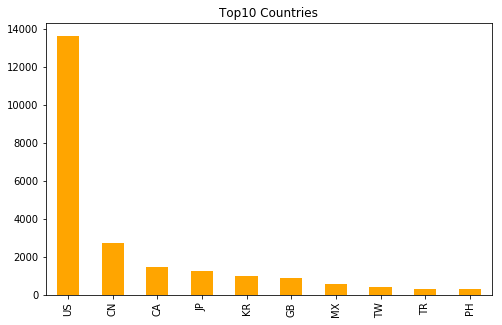

In [7]:
# graph of top10 countries
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top10 Countries")
df.Country.value_counts().head(10).plot(kind="bar", color = "orange")

In [8]:
# number of cities
len(df.City.unique())

5470

In [9]:
# top 10 cities
df.City.value_counts().head(10)

上海市            542
Seoul          243
北京市            234
New York       232
London         216
Toronto        192
Mexico City    180
Chicago        180
Seattle        156
Las Vegas      156
Name: City, dtype: int64

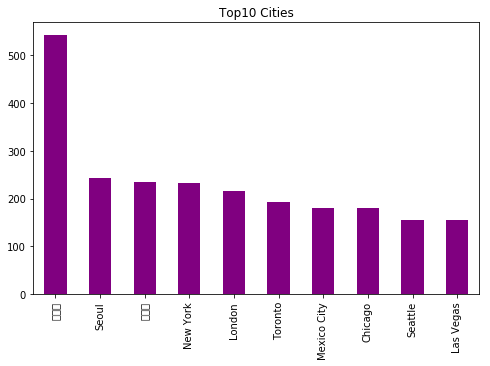

In [10]:
# graph of top10 cities
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Top10 Cities")
df.City.value_counts().head(10).plot(kind="bar", color = "purple")

In [11]:
# ownership type of Starbucks
df['Ownership Type'].value_counts()

Company Owned    11932
Licensed          9375
Joint Venture     3976
Franchise          317
Name: Ownership Type, dtype: int64

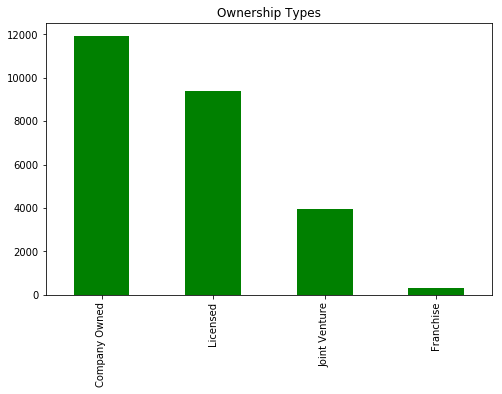

In [12]:
# graph of ownership types
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.set(title = "Ownership Types")
df['Ownership Type'].value_counts().plot(kind="bar", color = "green")
plt.show()

## 3. Methodology

## 4. Results

## 5. Discussion

## 6. Conclusion